In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [17]:
from ucimlrepo import fetch_ucirepo 

wine = fetch_ucirepo(id=109) 
  
X = pd.DataFrame(wine.data.features)
y = pd.DataFrame(wine.data.targets)

ConnectionError: Error connecting to server

In [ ]:
y.value_counts() ## number of data of each catagory

class
2        71
1        59
3        48
Name: count, dtype: int64

In [ ]:
X.duplicated().sum()  ## duplicated row 

0

In [ ]:
df = pd.concat([X,y],axis=1)

In [ ]:
display(df)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.drop("class", axis=1)))

df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers (Z-score):", df_no_outliers.shape)


Original shape: (178, 14)
After removing outliers (Z-score): (168, 14)


In [ ]:
X = df_no_outliers.drop("class",axis=1)
y = df_no_outliers["class"]

#### Heatmap

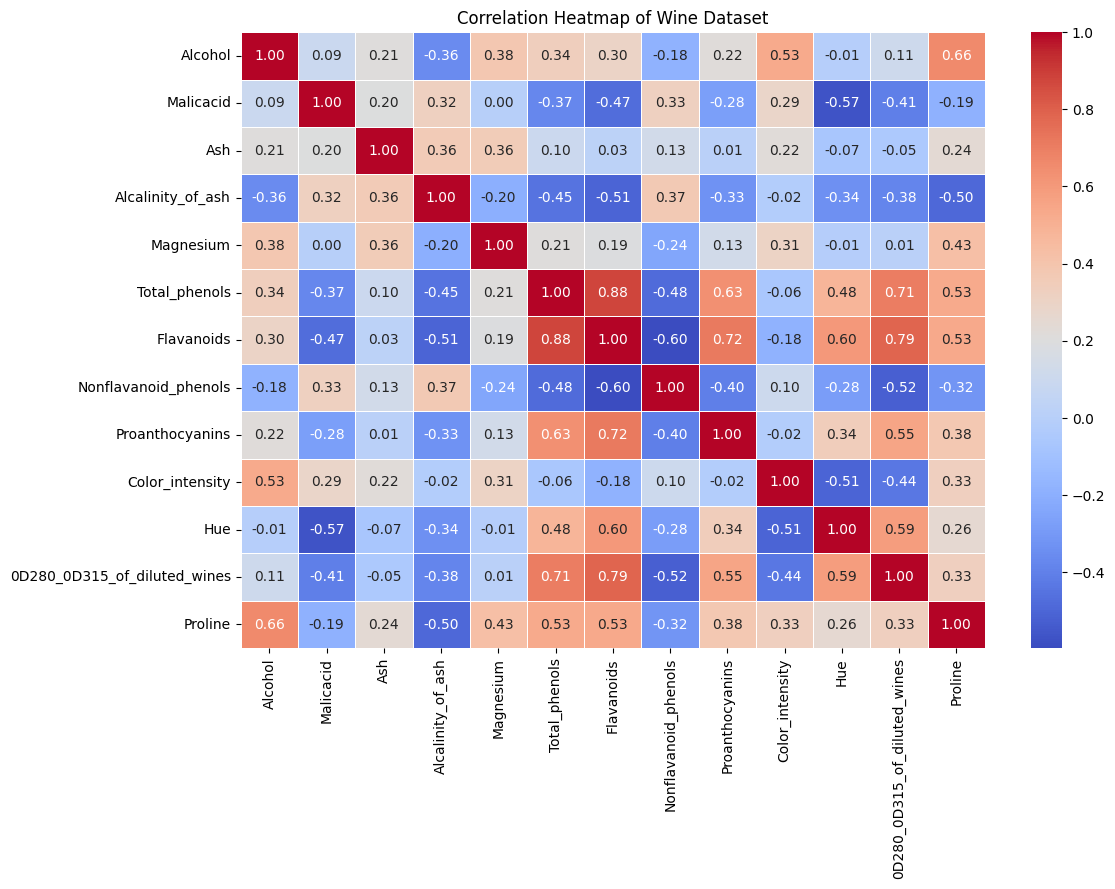

In [ ]:
corr = X.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()


#### Testing model accuracy at different splits

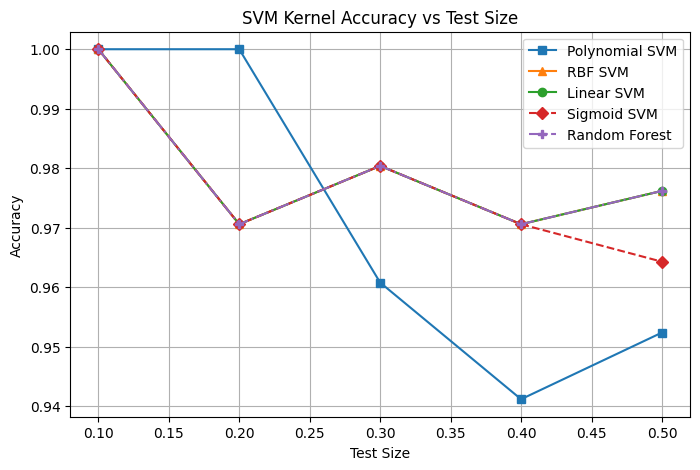

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def test_svm_models_accuracy(X, y):
    test_sizes = np.linspace(0.1, 0.5, 5)
    
    # Store accuracies for each kernel
    linear_acc = []
    poly_acc = []
    rbf_acc = []
    sigmoid_acc = []
    random_forest_acc = []
    
    for t in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=t, shuffle=True, random_state=10, stratify=y
        )
        
        # Scaling (important for SVM)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Linear SVM
        svm_linear = SVC(kernel="linear", C=1)
        svm_linear.fit(X_train, y_train)
        y_pred_l = svm_linear.predict(X_test)
        linear_acc.append(accuracy_score(y_test, y_pred_l))
        
        # Polynomial SVM
        svm_poly = SVC(kernel="poly", degree=3, C=1, gamma="scale")
        svm_poly.fit(X_train, y_train)
        y_pred_p = svm_poly.predict(X_test)
        poly_acc.append(accuracy_score(y_test, y_pred_p))
        
        # RBF (Gaussian) SVM
        svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
        svm_rbf.fit(X_train, y_train)
        y_pred_r = svm_rbf.predict(X_test)
        rbf_acc.append(accuracy_score(y_test, y_pred_r))
        
        # Sigmoid SVM
        svm_sigmoid = SVC(kernel="sigmoid", C=1, gamma="scale")
        svm_sigmoid.fit(X_train, y_train)
        y_pred_s = svm_sigmoid.predict(X_test)
        sigmoid_acc.append(accuracy_score(y_test, y_pred_s))

        #RandomForest

        forest = RandomForestClassifier(n_estimators=200,criterion="entropy",max_depth=4)
        forest.fit(X_train,y_train)
        y_pred_t = forest.predict(X_test)
        random_forest_acc.append(accuracy_score(y_test, y_pred_t))

    
    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(test_sizes, poly_acc, marker='s', label='Polynomial SVM')
    plt.plot(test_sizes, rbf_acc, marker='^', label='RBF SVM')
    plt.plot(test_sizes, linear_acc, marker='o', linestyle='-', label='Linear SVM')
    plt.plot(test_sizes, sigmoid_acc, marker='D', linestyle='--', label='Sigmoid SVM')
    plt.plot(test_sizes,random_forest_acc, marker='P',linestyle='-.', label='Random Forest')
    plt.xlabel("Test Size")
    plt.ylabel("Accuracy")
    plt.title("SVM Kernel Accuracy vs Test Size")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
test_svm_models_accuracy(X, y)


#### From the graph we can see that the models(without any tuning) are performaing best at 90% train and 10% percent test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=10, stratify=y
)

In [ ]:
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


def svm_train():
    models = ["linear", "poly", "rbf", "sigmoid"]

    for model_name in models: # Renamed 'model' to 'model_name' to avoid confusion with the module
        print(f"\n{'=' * 20} Model: {model_name.upper()} {'=' * 20}\n")

        svc = SVC(random_state=10, kernel=model_name)
        svc.fit(X_train, y_train)

        y_pred = svc.predict(X_test)

        
        print(" CONFUSION MATRIX ".center(80, "="))
        fig, ax = plt.subplots(figsize=(6, 6))
        disp = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
        # disp.plot() 
        plt.title(f'Confusion Matrix for {model_name.capitalize()} Kernel') 
        plt.show() 
        print("=" * 80)

        
        print(" CLASSIFICATION REPORT ".center(80, "="))
        print(classification_report(y_test, y_pred))
        print("=" * 80)

        
        print(" ACCURACY SCORE ".center(80, "="))
        print(f"{accuracy_score(y_test, y_pred)}")
        print("=" * 80)


==================== Model: LINEAR ====================

=============================== CONFUSION MATRIX ===============================


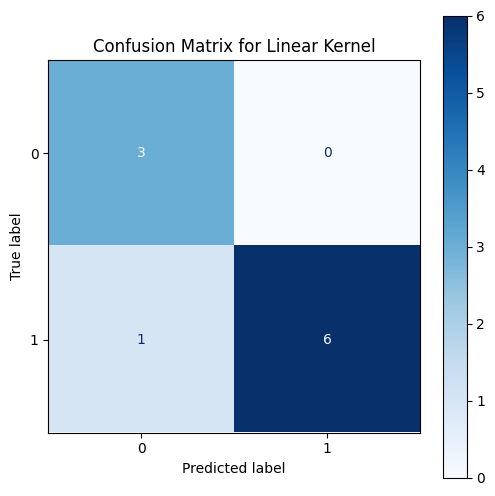

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

================================ ACCURACY SCORE ================================
0.9

==================== Model: POLY ====================

=============================== CONFUSION MATRIX ===============================


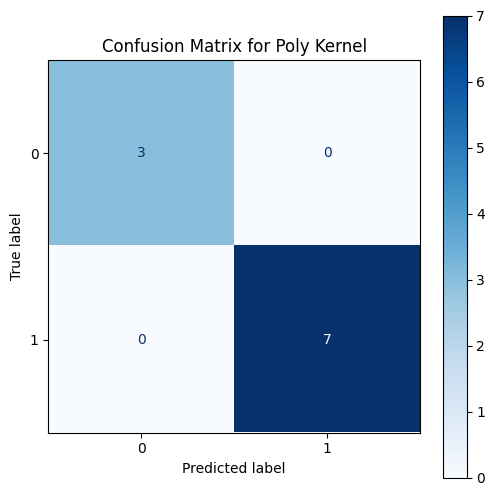

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0

==================== Model: RBF ====================

=============================== CONFUSION MATRIX ===============================


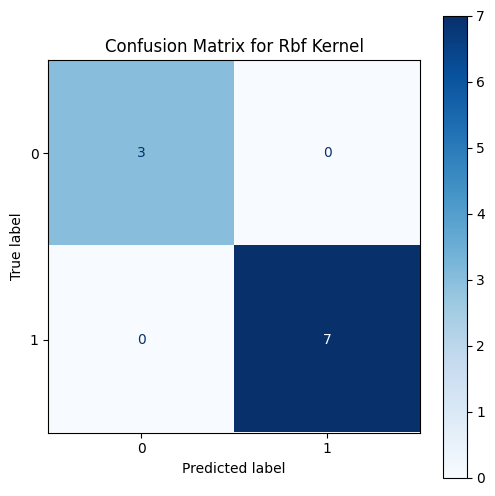

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0

==================== Model: SIGMOID ====================

=============================== CONFUSION MATRIX ===============================


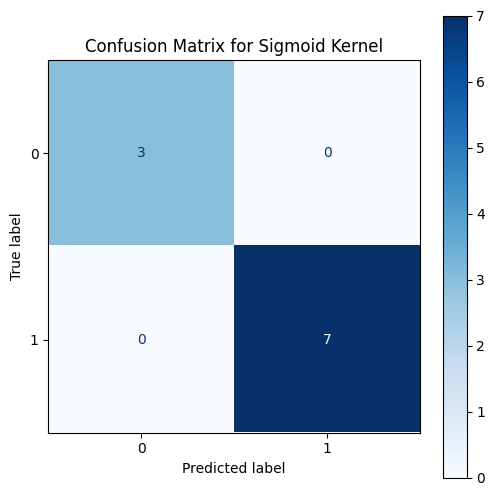

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0


In [ ]:
svm_train()

#### Fine tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

def svm_train_tuned():
    models = {
        "linear": {
            "C": [0.1, 1, 10, 100]
        },
        "poly": {
            "C": [0.1, 1, 10], 
            "degree": [2, 3, 4], 
            "gamma": ["scale", "auto"]
        },
        "rbf": {
            "C": [0.1, 1, 10, 100],
            "gamma": ["scale", "auto", 0.01, 0.1, 1]
        },
        "sigmoid": {
            "C": [0.1, 1, 10], 
            "gamma": ["scale", "auto"]
        }
    }

    for model_name, param_grid in models.items():
        print(f"\n{'=' * 20} Model: {model_name.upper()} {'=' * 20}\n")

        svc = SVC(kernel=model_name, random_state=10)
        grid = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, scoring="accuracy")
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        print(f"Best Parameters: {grid.best_params_}\n")

        # Confusion Matrix
        print(" CONFUSION MATRIX ".center(80, "="))
        fig, ax = plt.subplots(figsize=(6, 6))
        ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name.capitalize()} Kernel (Tuned)')
        plt.show()
        print("=" * 80)

        # Classification Report
        print(" CLASSIFICATION REPORT ".center(80, "="))
        print(classification_report(y_test, y_pred))
        print("=" * 80)

        # Accuracy
        print(" ACCURACY SCORE ".center(80, "="))
        print(f"{accuracy_score(y_test, y_pred)}")
        print("=" * 80)



==================== Model: LINEAR ====================

Best Parameters: {'C': 0.1}

=============================== CONFUSION MATRIX ===============================


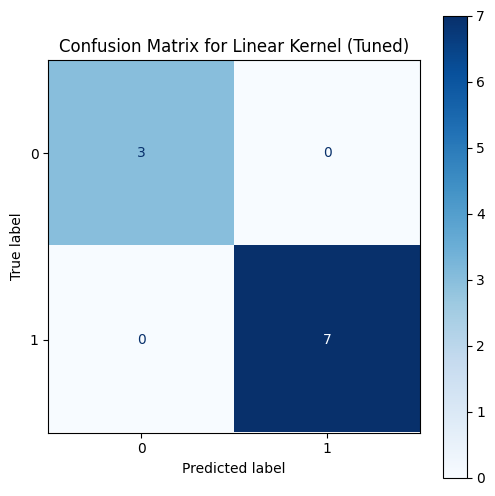

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0

==================== Model: POLY ====================

Best Parameters: {'C': 0.1, 'degree': 3, 'gamma': 'auto'}

=============================== CONFUSION MATRIX ===============================


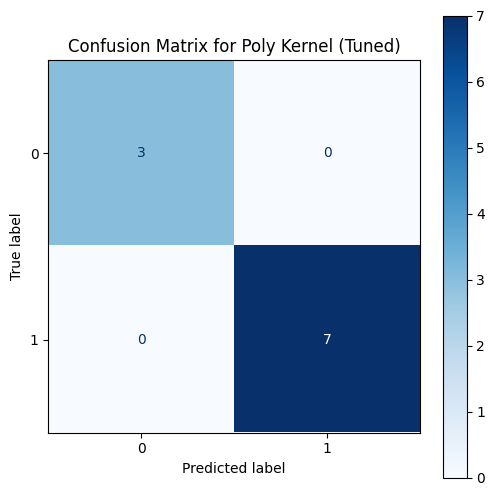

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0

==================== Model: RBF ====================

Best Parameters: {'C': 1, 'gamma': 0.01}

=============================== CONFUSION MATRIX ===============================


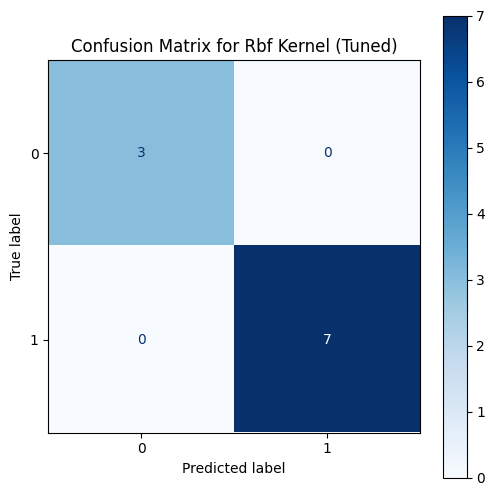

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0

==================== Model: SIGMOID ====================

Best Parameters: {'C': 0.1, 'gamma': 'scale'}

=============================== CONFUSION MATRIX ===============================


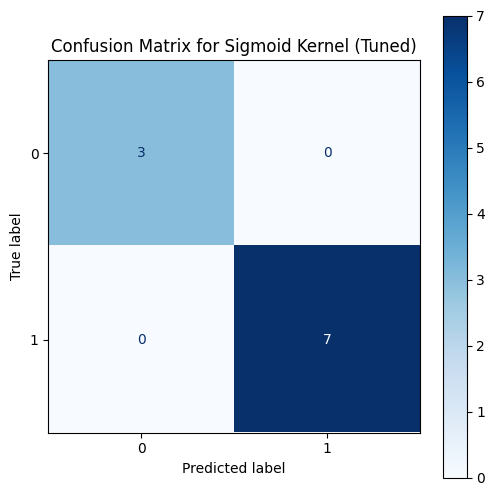

============================ CLASSIFICATION REPORT =============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

================================ ACCURACY SCORE ================================
1.0


In [ ]:
svm_train_tuned()